In [156]:
#import pandas
import pandas as pd

In [157]:
#get data
df = pd.read_csv('D:/food_delivery_datasets.csv')
df

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [158]:
#selecting dataframe
df = df[['date_time','cust_id','status']]
df

,date_time,cust_id,status
0,2018-08-12T20:35:08.001006,1089034,Completed
1,2018-09-23T17:44:12.243273,180146,Completed
2,2018-09-19T18:08:09.387991,366528,Completed
3,2018-09-21T01:24:35.272499,511038,Completed
4,2018-09-22T17:57:45.523161,1220358,Completed
...,...,...,...
1071,2018-09-20T15:01:52.152828,1296335,Completed
1072,2018-07-26T14:43:23.655294,1135466,Completed
1073,2018-08-21T20:10:59.283185,1383625,Completed
1074,2018-07-16T14:42:23.214427,1094787,Completed


In [159]:
#grouping status
group_status = df.groupby('status').size()
group_status

status
Cancelled    195
Completed    881
dtype: int64

In [160]:
#filtering data (status Completed)
stat_complt = cust_stat[cust_stat.status=='Completed']
stat_complt

,date_time,cust_id,status
0,2018-08-12T20:35:08.001006,1089034,Completed
1,2018-09-23T17:44:12.243273,180146,Completed
2,2018-09-19T18:08:09.387991,366528,Completed
3,2018-09-21T01:24:35.272499,511038,Completed
4,2018-09-22T17:57:45.523161,1220358,Completed
...,...,...,...
1071,2018-09-20T15:01:52.152828,1296335,Completed
1072,2018-07-26T14:43:23.655294,1135466,Completed
1073,2018-08-21T20:10:59.283185,1383625,Completed
1074,2018-07-16T14:42:23.214427,1094787,Completed


In [161]:
#convert to datetime
stat_complt['date_time']=pd.to_datetime(stat_complt['date_time'])
months = stat_complt['date_time'].dt.strftime('%B')
days = stat_complt['date_time'].dt.strftime('%A')
stat_complt = pd.concat([months,days,stat_complt['cust_id'],stat_complt['status']],axis=1)
stat_complt.columns = ['months','days','cust_id','status']
stat_complt

<ipython-input-161-fabbb0b4bfa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_complt['date_time']=pd.to_datetime(stat_complt['date_time'])


,months,days,cust_id,status
0,August,Sunday,1089034,Completed
1,September,Sunday,180146,Completed
2,September,Wednesday,366528,Completed
3,September,Friday,511038,Completed
4,September,Saturday,1220358,Completed
...,...,...,...,...
1071,September,Thursday,1296335,Completed
1072,July,Thursday,1135466,Completed
1073,August,Tuesday,1383625,Completed
1074,July,Monday,1094787,Completed


In [162]:
#grouping days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
group_days = stat_complt.groupby('days').size().reindex(days)
group_days

days
Monday        99
Tuesday      116
Wednesday    104
Thursday     107
Friday       122
Saturday     151
Sunday       182
dtype: int64

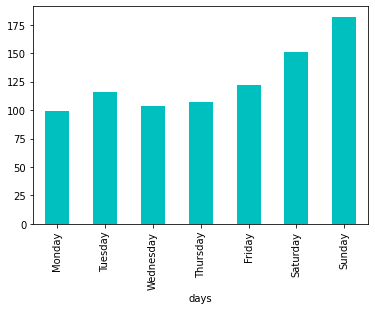

In [163]:
#plot
group_days.plot(kind='bar',color='c')

In [164]:
#grouping months
group_months = stat_complt.groupby('months').size()
group_months

months
August       271
July         268
September    342
dtype: int64

In [165]:
#frequency
freq_days_jul = stat_complt[stat_complt['months']=='July'].groupby('days').size().reindex(days)
freq_days_agt = stat_complt[stat_complt['months']=='August'].groupby('days').size().reindex(days)
freq_days_sept = stat_complt[stat_complt['months']=='September'].groupby('days').size().reindex(days)

freq_months = pd.concat([freq_days_jul,freq_days_agt,freq_days_sept],axis=1,keys=['July','August','September'])
freq_months

,July,August,September
days,,,
Monday,33,26,40
Tuesday,49,22,45
Wednesday,32,41,31
Thursday,32,37,38
Friday,30,48,44
Saturday,37,47,67
Sunday,55,50,77


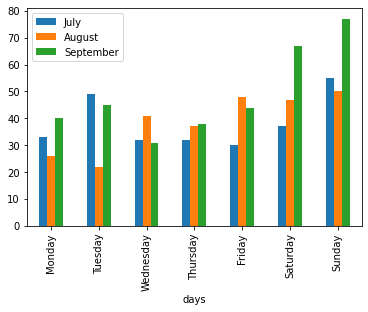

In [166]:
#plot
freq_months.plot(kind='bar')